### QUESTION 2


In [96]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import scipy.io
import numpy as np
mat_file = scipy.io.loadmat('final.mat')
data = mat_file['DataMatrix'][()]
df = pd.DataFrame(data)
data_with_label= df
df=df.drop(df.columns[27], axis=1)
Original_Data= df
df.shape


(41, 27)

### PCA 

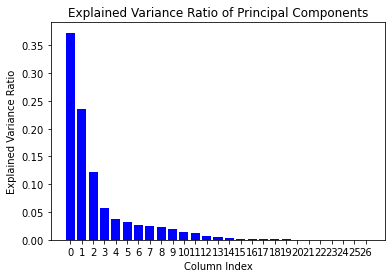

In [97]:
pca = PCA()
X_reduced = pca.fit_transform(df)
explained_variance_ratio = pca.explained_variance_ratio_
plt.bar(np.arange(len(explained_variance_ratio)), explained_variance_ratio, color='blue')
plt.xlabel('Column Index')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio of Principal Components')
plt.xticks(np.arange(len(explained_variance_ratio)))
plt.show()

In [98]:
explained_variance_ratio.cumsum()

array([0.37274356, 0.60867554, 0.7316082 , 0.78890848, 0.82678023,
       0.85830202, 0.88580063, 0.91021776, 0.9335716 , 0.9529777 ,
       0.96666632, 0.97923167, 0.98568521, 0.99027762, 0.9933198 ,
       0.99497452, 0.9962517 , 0.99747494, 0.99823823, 0.9987877 ,
       0.99928951, 0.99963161, 0.99991398, 1.        , 1.        ,
       1.        , 1.        ])

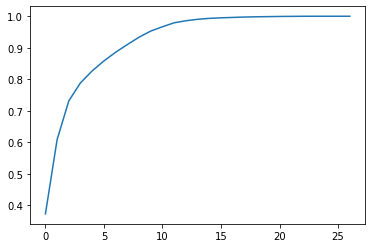

In [99]:
plt.plot(explained_variance_ratio.cumsum())

### Data preprocessing


#### Apply a normalized scaler

In [100]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(Original_Data)

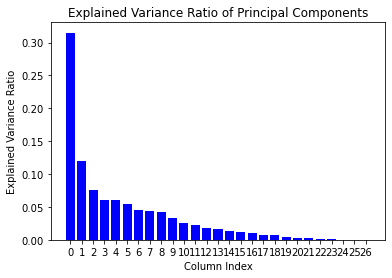

In [101]:
### apply PCA for the normaized data
pca2 = PCA()
X_reduced_2 = pca2.fit_transform(df_scaled)
explained_variance_ratio_2 = pca2.explained_variance_ratio_
plt.bar(np.arange(len(explained_variance_ratio)), explained_variance_ratio_2, color='blue')
plt.xlabel('Column Index')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio of Principal Components')
plt.xticks(np.arange(len(explained_variance_ratio)))
plt.show()

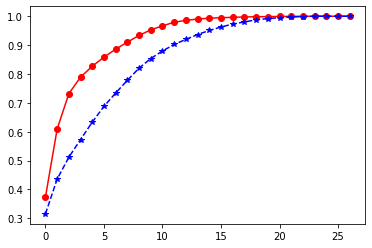

In [102]:
plt.plot(explained_variance_ratio.cumsum(), 'r-o', label='Line 1')
plt.plot(explained_variance_ratio_2.cumsum(), 'b--*', label='Line 2')

### Try New scaller 

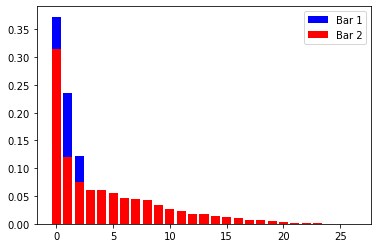

In [103]:
# Create some data for the first bar plot
x1 = np.arange(len(explained_variance_ratio))
y1 = explained_variance_ratio

# Create some data for the second bar plot
x2 = np.arange(len(explained_variance_ratio_2))
y2 = explained_variance_ratio_2

# Plot the first bar plot
plt.bar(x1, y1, color='blue', label='Bar 1')

# Plot the second bar plot
plt.bar(x2, y2, color='red', label='Bar 2')

# Add a legend
plt.legend()

# Show the plot
plt.show()

In [104]:
explained_variance_ratio_2.cumsum()

array([0.31494525, 0.43541527, 0.51142108, 0.57267174, 0.63285724,
       0.68780056, 0.73378297, 0.77805061, 0.82012271, 0.85354733,
       0.8794629 , 0.90240771, 0.91961707, 0.93664676, 0.95061571,
       0.96280495, 0.97286336, 0.98029176, 0.98753439, 0.99179182,
       0.99505289, 0.99717377, 0.99904485, 1.        , 1.        ,
       1.        , 1.        ])

In [105]:

explained_variance_ratio_2

array([3.14945252e-01, 1.20470021e-01, 7.60058119e-02, 6.12506515e-02,
       6.01855023e-02, 5.49433196e-02, 4.59824084e-02, 4.42676410e-02,
       4.20720998e-02, 3.34246188e-02, 2.59155755e-02, 2.29448091e-02,
       1.72093581e-02, 1.70296955e-02, 1.39689453e-02, 1.21892360e-02,
       1.00584103e-02, 7.42840832e-03, 7.24262595e-03, 4.25743177e-03,
       3.26106695e-03, 2.12088553e-03, 1.87107403e-03, 9.55151896e-04,
       2.46669602e-33, 2.46669602e-33, 2.46669602e-33])

### Handle Outliers

In [106]:
Outlier = Original_Data
# Calculate the z-score for each value in the dataframe
z_scores = (Outlier - Outlier.mean()) / Outlier.std()
# Identify the rows with outliers
outliers = (np.abs(z_scores) > 3).any(axis=1)
# Remove the rows with outliers
df_without_outliers = df[~outliers]
df_without_outliers.shape



(29, 27)

### resulted a data frame with 29 rows so 12 rows were removed from original data


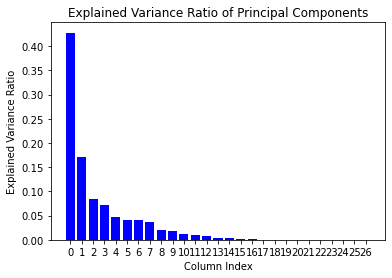

In [107]:
pca3 = PCA()
X_reduced_3 = pca3.fit_transform(df_without_outliers)
explained_variance_ratio_3 = pca3.explained_variance_ratio_
plt.bar(np.arange(len(explained_variance_ratio_3)), explained_variance_ratio_3, color='blue')
plt.xlabel('Column Index')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio of Principal Components')
plt.xticks(np.arange(len(explained_variance_ratio)))
plt.show()

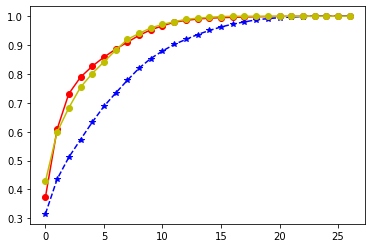

In [108]:
plt.plot(explained_variance_ratio.cumsum(), 'r-o', label='raw')
plt.plot(explained_variance_ratio_2.cumsum(), 'b--*', label='Preprocessed')
plt.plot(explained_variance_ratio_3.cumsum(), 'y-o', label='Outliers removed')


In [109]:
X_reduced= pd.DataFrame(X_reduced)
X_reduced_2=pd.DataFrame(X_reduced_2)
X_reduced_3=pd.DataFrame(X_reduced_3)
X_reduced["label"]=data_with_label.iloc[:,27]
X_reduced_2["label"]=data_with_label.iloc[:,27]
X_reduced_3["label"]=data_with_label.iloc[:,27]


In [110]:
X_reduced_3

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,label
0,0.381926,2.293043,0.908005,1.555769,-2.173155,-0.952718,1.395854,1.029646,0.526970,0.085972,...,2.370606e-16,1.196903e-17,-1.091556e-16,2.772047e-16,1.687008e-16,5.496310e-16,-2.233102e-16,-1.761169e-16,1.289730e-18,1
1,-0.044772,-2.075809,-1.117486,-1.703159,-0.558528,1.046519,-0.449530,1.743460,-0.253673,0.200688,...,4.957764e-16,-1.608630e-17,-9.612252e-17,1.307340e-16,3.746854e-16,8.496332e-17,1.699908e-16,-1.956618e-16,-2.351323e-16,1
2,4.184069,-1.138233,2.224252,1.231534,0.102570,-0.654482,0.604595,0.284798,1.034563,-1.053662,...,1.224469e-17,-4.580064e-16,4.571538e-17,-3.987645e-16,1.709714e-17,-3.453831e-17,2.926314e-16,-5.342106e-16,9.650867e-17,1
3,3.961403,-1.166134,-0.255814,0.843314,0.054128,-0.251901,-0.365703,0.341301,1.497000,0.340603,...,2.785600e-16,-1.751783e-16,-2.193954e-16,2.305407e-16,5.477961e-17,1.635669e-16,-2.127881e-16,5.590676e-16,2.971687e-16,1
4,5.396655,0.847934,-0.913558,-0.996786,-0.812549,1.768848,-1.903381,-0.172068,-0.086581,0.095059,...,1.226803e-16,2.000735e-16,1.824965e-16,9.150952e-18,-1.920002e-16,5.381291e-16,1.012977e-16,-2.886748e-17,1.392159e-16,1
5,3.280201,-2.072558,-1.326532,-0.452304,-0.762803,-1.100211,-0.078474,0.226851,0.028389,-0.604627,...,-1.627438e-17,3.265879e-16,-3.186996e-16,-4.016237e-16,-4.787454e-16,3.906732e-17,1.169430e-16,-8.012667e-17,1.249776e-16,1
6,4.879487,2.710359,-1.798693,-0.183714,1.317159,0.824250,0.671672,-0.779975,-0.591634,-0.090275,...,-1.328082e-16,-3.740379e-18,-2.745040e-16,-3.423368e-16,3.143105e-16,4.082312e-16,-8.262477e-18,-2.880622e-16,1.965123e-16,1
7,1.954291,1.139604,-0.204021,-1.004699,1.786555,0.088172,1.707134,-0.544703,-0.267319,-0.339358,...,1.692549e-16,6.316339e-17,1.128630e-16,2.570656e-16,-4.837959e-17,-1.031088e-16,-3.089719e-16,-2.135226e-16,2.656267e-16,1
8,1.577560,-2.347548,-0.879305,-0.546869,-0.577720,-0.437634,1.118080,0.155746,-0.050755,2.375547,...,1.845279e-16,-3.084235e-16,-5.898131e-17,-3.076574e-17,1.062286e-16,-3.100397e-16,3.250411e-17,-2.759206e-16,9.315497e-17,1
9,2.155830,-0.470329,0.734791,0.140392,0.010014,-1.879561,-1.647011,-0.067162,-0.581414,0.678516,...,-3.045685e-16,2.729525e-16,3.274548e-16,-7.384431e-17,5.011764e-16,-2.424850e-16,3.445733e-17,6.156696e-17,5.178155e-16,1
